# Рубежный контроль №1

#### Васюнин Михаил ИУ5-61Б

Импорт библиотек

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

В качестве датасета возьмём данные приложений Google Play

In [3]:
#Загрузка датасета
data = pd.read_csv("googleplaystore.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.shape

(10841, 13)

В качестве целевого признака будем использовать категорию приложения

Проверка на наличие пропусков

In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Удалим строки, содержащие пропуски

In [7]:
data = data.dropna(axis=0)
data.shape

(9360, 13)

In [8]:
#Проверка типов
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Преобразование типов
Преобразуем значения типа object для возможности обучения модели

In [9]:
#Преобразование Reviews
for i in range(data.shape[0]):
    if data["Reviews"].iloc[i] == "3.0M":
        data["Reviews"].iloc[i] = 3000000
data = data.astype({"Reviews": "int64"})

In [10]:
#Преобразование Installs
for i in range(data.shape[0]):
    str = data["Installs"].iloc[i][:-1]
    data["Installs"].iloc[i] = int(str.replace(",", ""))
data = data.astype({"Installs": "int64"})

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
#Преобразование Type
leType = LabelEncoder()
le_arr = leType.fit_transform(data["Type"])
data["Type"] = le_arr
data = data.astype({"Type":"int64"})

In [12]:
#Преобразование Price
for i in range(data.shape[0]):
    if data["Price"].iloc[i] != "0":
        data["Price"].iloc[i] = data["Price"].iloc[i][1:]
data = data.astype({"Price":"float64"})

In [13]:
#Преобразование Content Rating
leContent = LabelEncoder()
le_arr = leContent.fit_transform(data["Content Rating"])
data["Content Rating"] = le_arr
data["Content Rating"].unique()
data = data.astype({"Content Rating":"int64"})

In [14]:
#Преобразование Category
leCategory = LabelEncoder()
le_arr = leCategory.fit_transform(data["Category"])
data["Category"] = le_arr
data["Category"].unique()
data = data.astype({"Category":"int64"})

In [15]:
#Результаты преобразования
data.dtypes

App                object
Category            int64
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Диаграмма рассеяния

<AxesSubplot:title={'center':'Диаграмма рассеяния для колонок Rating и Category'}, xlabel='Category', ylabel='Rating'>

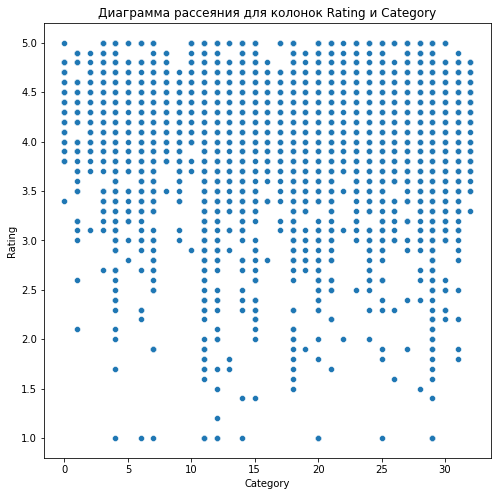

In [16]:
fig, ax = plt.subplots(figsize=(8,8)) 
ax.set_title("Диаграмма рассеяния для колонок Rating и Category")
sns.scatterplot(ax=ax, x='Category', y='Rating', data=data)

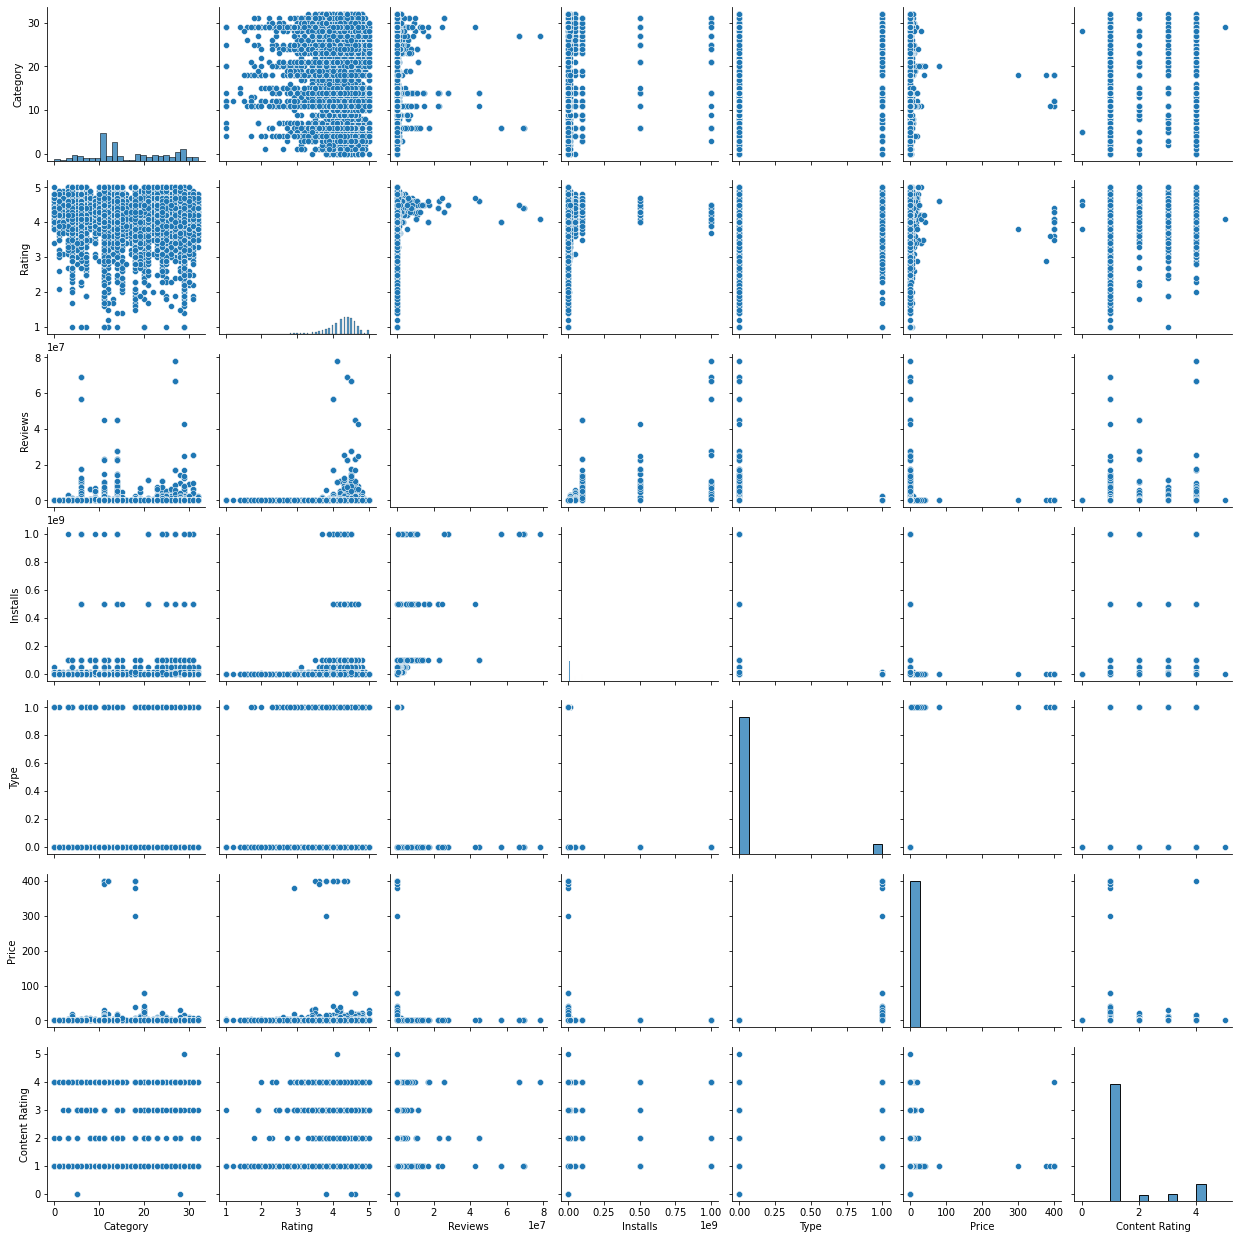

In [17]:
sns.pairplot(data)

## Корреляционный анализ
Создадим корреляционную матрицу используя коэффициент Пирсона

In [18]:
data.corr(method="pearson")

,Category,Rating,Reviews,Installs,Type,Price,Content Rating
Category,1.000000,-0.035154,0.000888,0.022778,0.023258,-0.012920,-0.105935
Rating,-0.035154,1.000000,0.068133,0.051337,0.039592,-0.021919,0.019800
Reviews,0.000888,0.068133,1.000000,0.641605,-0.043244,-0.009824,0.070484
Installs,0.022778,0.051337,0.641605,1.000000,-0.053049,-0.011895,0.053305
Type,0.023258,0.039592,-0.043244,-0.053049,1.000000,0.223344,-0.046644
Price,-0.012920,-0.021919,-0.009824,-0.011895,0.223344,1.000000,-0.014099
Content Rating,-0.105935,0.019800,0.070484,0.053305,-0.046644,-0.014099,1.000000


<AxesSubplot:>

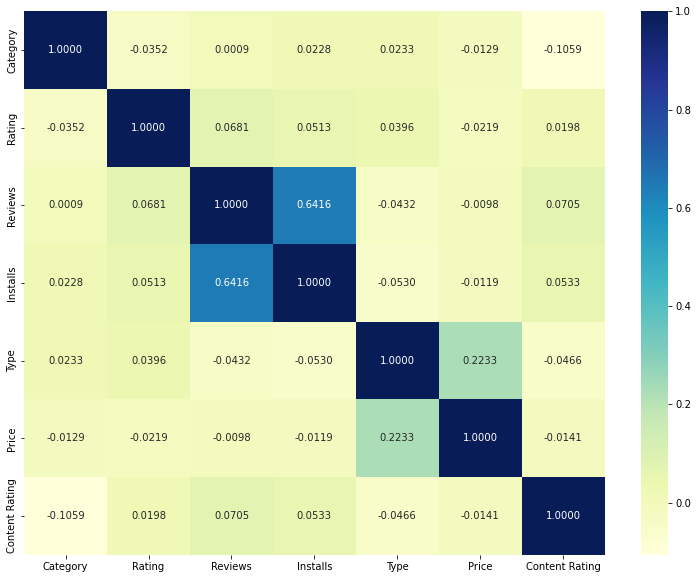

In [19]:
fig, ax = plt.subplots(1,1, figsize=(13,10))
sns.heatmap(data.corr("pearson"), annot=True, fmt=".4f", cmap="YlGnBu")

На основе корреляционной матрицы можно сделать следующие выводы.

Все признаки слабо коррелируют с целевым признаком Category. Признаки Reviews и Installs сильно коррелируют между собой.

Следовательно для обучения модели можем выбрать все признаки, кроме Reviews.